# STATS 131 S19 Final Project - Pokemon.csv

### Albert Na, Kathy Fu, Mark Tolentino, Tiffaney Pi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pokemon = pd.read_csv('Pokemon.csv')
# should we ignore the 'Type 2' column? 

In [76]:
pokemon['Type 2'].fillna(value='None', inplace=True)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [13]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [14]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [18]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [19]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [20]:
pokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

# (1) Exploratory Data Analysis

### How many Pokemon are distributed across the generations? 

/Users/tiffaney/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Pokemon in each Generation')

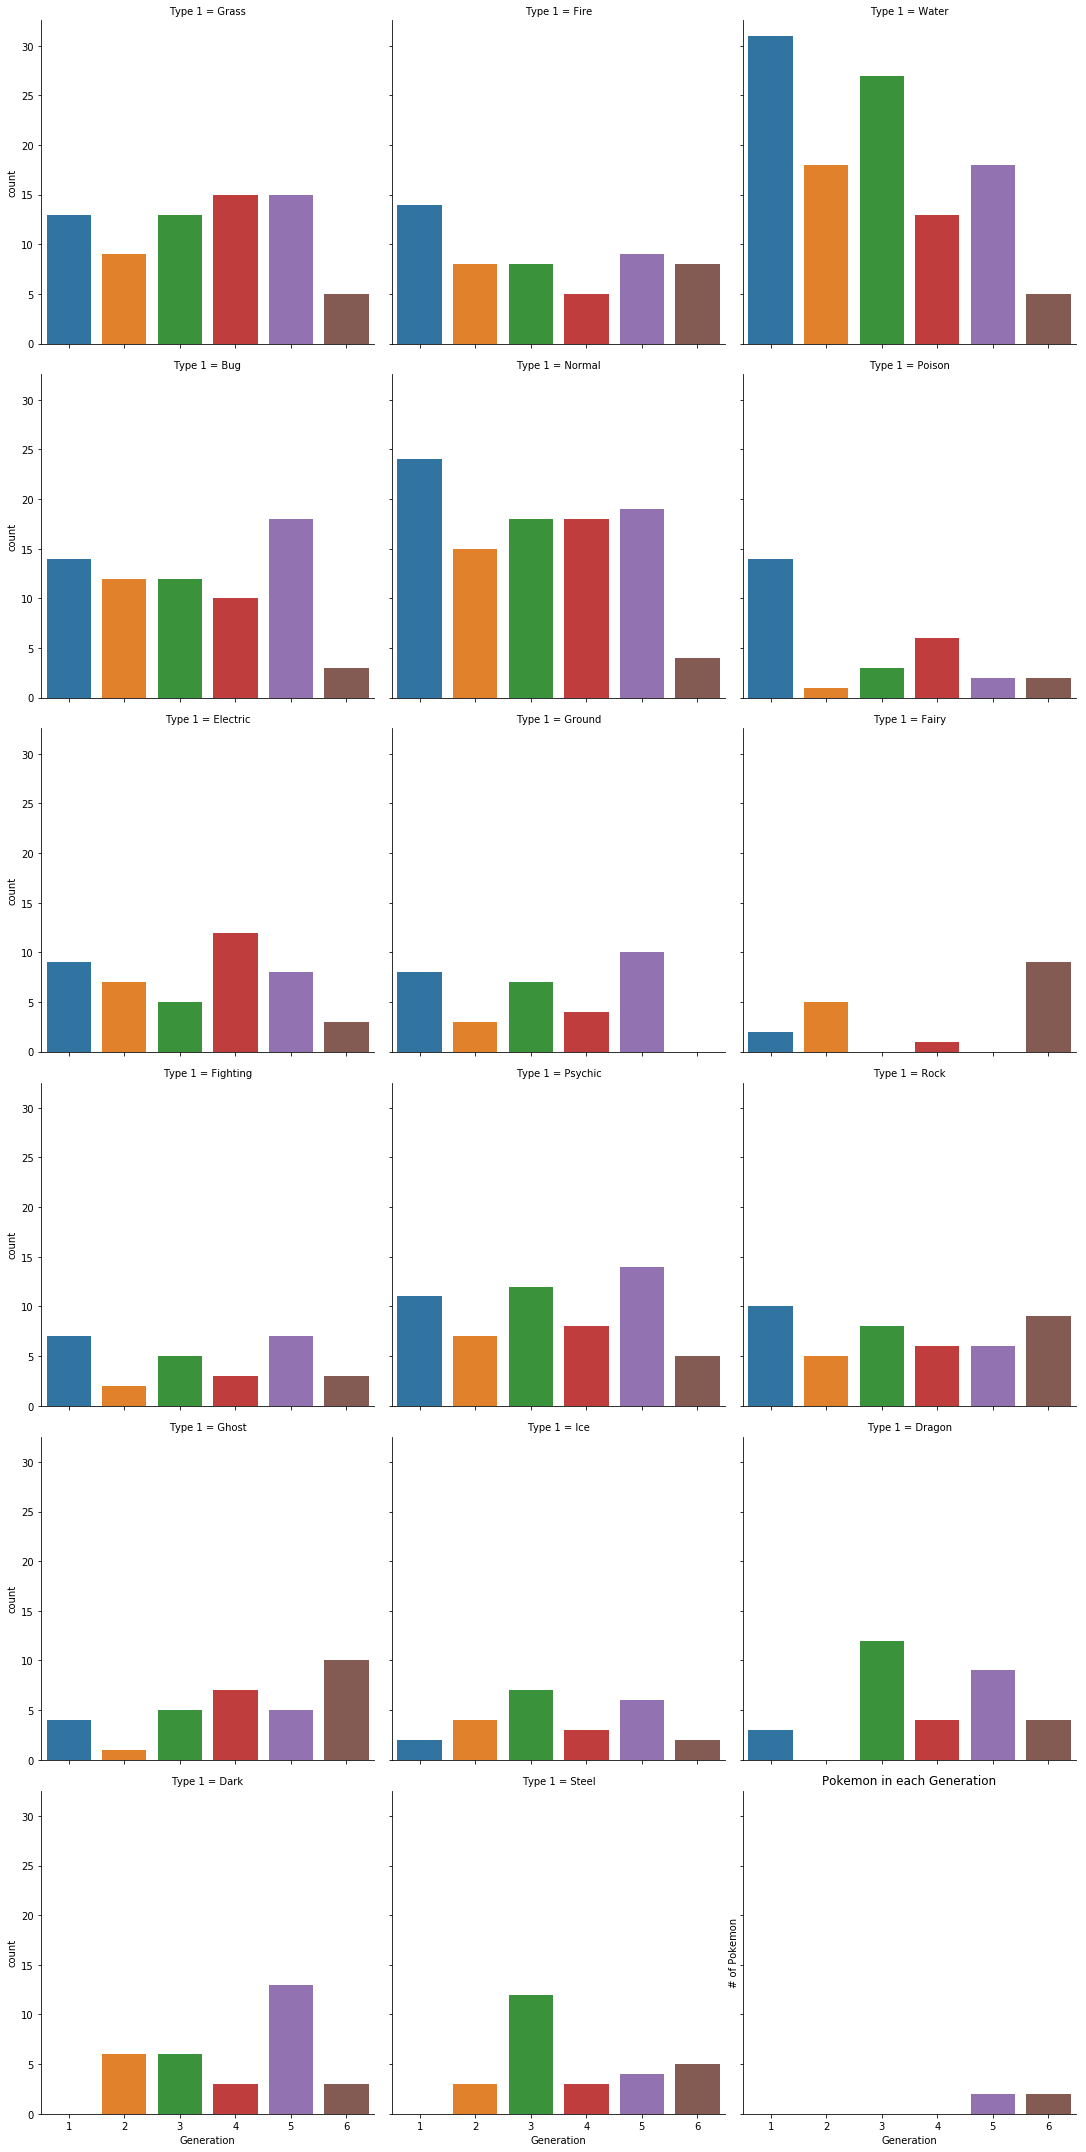

In [81]:
sns.factorplot(x='Generation', data=pokemon, kind='count', col='Type 1', col_wrap=3)
plt.ylabel('# of Pokemon')
plt.title('Pokemon in each Generation')

### What are the most common types of Pokemon? 

/Users/tiffaney/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'What are the most common types of Pokemon? (Type 1)')

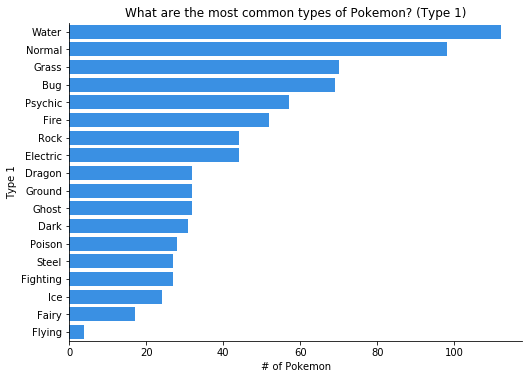

In [85]:
sns.factorplot(y='Type 1', data=pokemon,kind='count', order=pokemon['Type 1'].value_counts().index, aspect=1.5,
               color='dodgerblue').set_axis_labels('# of Pokemon', 'Type 1')
plt.title('What are the most common types of Pokemon? (Type 1)')

/Users/tiffaney/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'What are the most common Pokemon? (Type 2)')

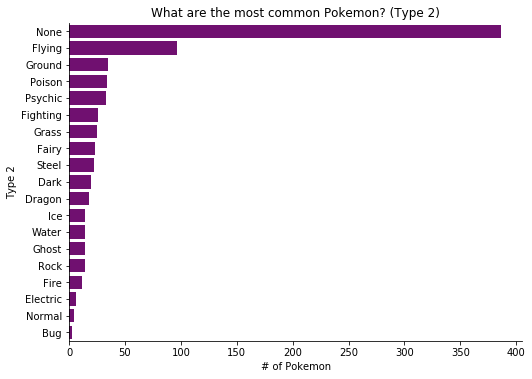

In [88]:
sns.factorplot(y='Type 2', data=pokemon, kind='count', order=pokemon['Type 2'].value_counts().index, aspect=1.5,
               color='purple').set_axis_labels('# of Pokemon', 'Type 2')
plt.title('What are the most common Pokemon? (Type 2)')

In [49]:
# Look at the TOP 5 most popular types and the mean basic stats: Water, Normal, Grass, Bug, Psychic? (or pick a different common 5)
pokemon.loc[ (pokemon['Type 1'] == 'Water') | (pokemon['Type 1'] == 'Normal') | (pokemon['Type 1'] == 'Grass') |
            (pokemon['Type 1'] == 'Bug') | (pokemon['Type 1'] == 'Psychic')].groupby('Type 1')['Total', 'HP', 
                                                                                               'Attack', 'Defense',
                                                                                               'Sp. Atk', 'Sp. Def', 
                                                                                               'Speed'].mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Grass,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571
Normal,401.683673,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020
Psychic,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228
Water,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286


In [74]:
pokemon.groupby('Type 1')['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'].mean().sort_values(['Total'], ascending=False)                                                                                            

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Steel,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Psychic,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Rock,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

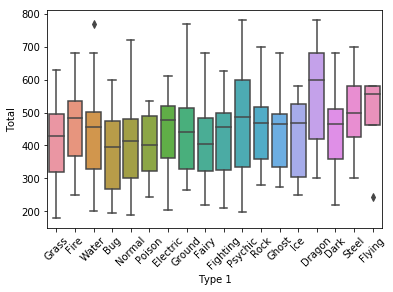

In [62]:
sns.boxplot(x='Type 1', y='Total', data=pokemon)
plt.xticks(rotation=45)
# .loc[ (pokemon['Type 1'] == 'Water') | (pokemon['Type 1'] == 'Normal') | (pokemon['Type 1'] == 'Grass') | (pokemon['Type 1'] == 'Bug') | (pokemon['Type 1'] == 'Psychic')]

(0, 150)

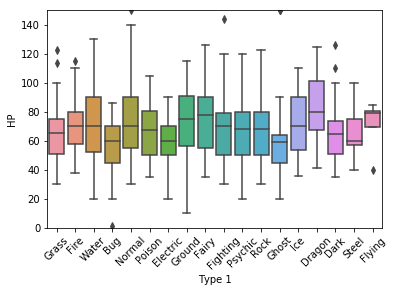

In [66]:
sns.boxplot(x='Type 1', y='HP', data=pokemon)
plt.xticks(rotation = 45)
plt.ylim((0,150))

(0, 200)

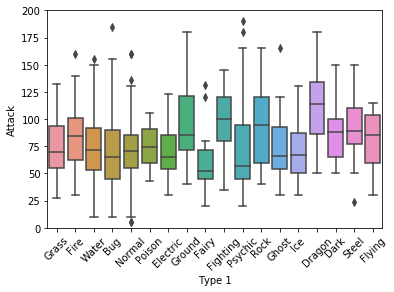

In [68]:
sns.boxplot(x='Type 1', y='Attack', data=pokemon)
plt.xticks(rotation = 45)
plt.ylim((0,200))

(0, 210)

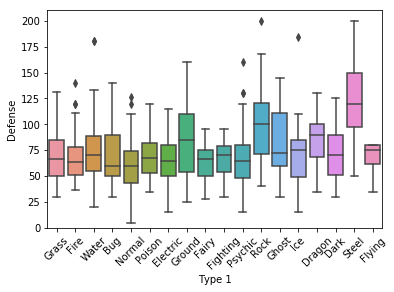

In [71]:
sns.boxplot(x='Type 1', y='Defense', data=pokemon)
plt.xticks(rotation = 45)
plt.ylim((0,210))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

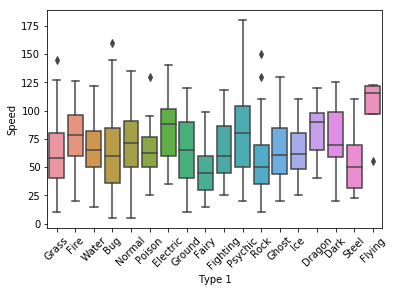

In [64]:
sns.boxplot(x='Type 1', y='Speed', data=pokemon)
plt.xticks(rotation = 45)

/Users/tiffaney/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


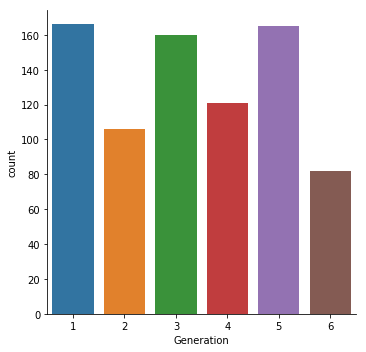

# ?? (2) Make a new column called 'strength' aka standardize the Total column